In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('customer_churn_dataset-training-master.csv')
data

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
data.head(4)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0


In [ ]:
data.tail(4)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0
440832,449999.0,31.0,Male,48.0,20.0,1.0,14.0,Premium,Quarterly,567.77,21.0,0.0


In [ ]:
data.shape

(440833, 12)

In [ ]:
bin_edges = [0, 18, 25, 35, 45, 55, 65, float('inf')]
age_labels = ['0-17', '18-25', '26-35', '36-45', '46-55', '56-65', '66+']

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'], bins=bin_edges, labels=age_labels, right=False)


In [ ]:
age_counts = data['AgeGroup'].value_counts()
print(age_counts)

36-45    117210
26-35    102693
46-55     96979
18-25     64036
56-65     54454
66+        5460
0-17          0
Name: AgeGroup, dtype: int64


<Axes: >

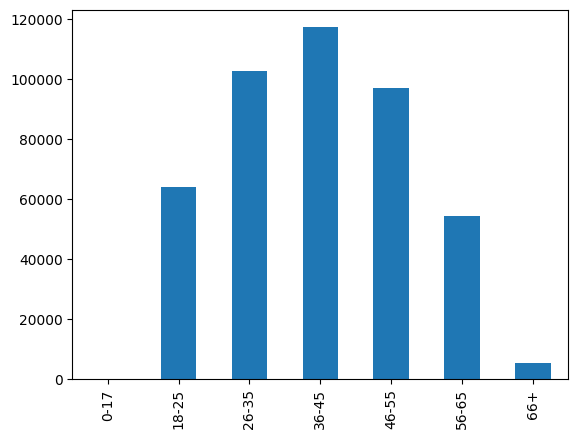

In [ ]:
data['AgeGroup'].value_counts(sort=False).plot(kind='bar')

In [ ]:
print(data[['CustomerID','AgeGroup']])

        CustomerID AgeGroup
0              2.0    26-35
1              3.0      66+
2              4.0    56-65
3              5.0    56-65
4              6.0    18-25
...            ...      ...
440828    449995.0    36-45
440829    449996.0    26-35
440830    449997.0    26-35
440831    449998.0    26-35
440832    449999.0    26-35

[440833 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])

In [ ]:
data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroup
0,2.0,30.0,0,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0,26-35
1,3.0,65.0,0,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0,66+
2,4.0,55.0,0,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0,56-65
3,5.0,58.0,1,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0,56-65
4,6.0,23.0,1,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0,18-25


after transformation female data was transformed to 0 and male data was transformed to 1

In [ ]:
le=LabelEncoder()
data['Subscription Type']=le.fit_transform(data['Subscription Type'])

In [ ]:
data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroup
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,Annual,932.0,17.0,1.0,26-35
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,Monthly,557.0,6.0,1.0,66+
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,Quarterly,185.0,3.0,1.0,56-65
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,Monthly,396.0,29.0,1.0,56-65
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,Monthly,617.0,20.0,1.0,18-25


after transformation standard data was transformed to 2 and basic data was transformed to 0

In [ ]:
le=LabelEncoder()
data['Contract Length']=le.fit_transform(data['Contract Length'])
data.head(5)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroup
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0,26-35
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0,66+
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0,56-65
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0,56-65
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0,18-25


In [ ]:
covariance_matrix = np.cov(data['Gender'],data['Subscription Type'])
print(covariance_matrix)

[[ 2.45423921e-01 -4.04111636e-04]
 [-4.04111636e-04  6.62550543e-01]]


<Axes: >

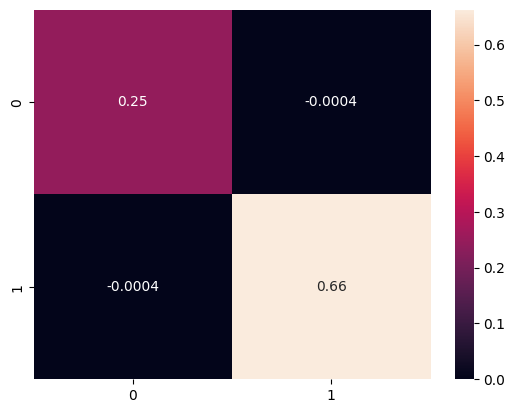

In [ ]:
sns.heatmap(covariance_matrix, annot=True)

In [ ]:
import scipy.stats as stats

In [ ]:
# Print the contingency table
contingency_table = pd.crosstab(data['AgeGroup'],data['Subscription Type'])
print(contingency_table)
# Calculate the chi-square statistic
chi_square_statistic, p_value, df_value, expected_values = stats.chi2_contingency(contingency_table)
# Print the chi-square statistic and p-value
print(chi_square_statistic, p_value)
# If the p-value is less than 0.05, then there is a significant relationship between Age Group and Subscription Type
if p_value < 0.05:
    print("There is a significant relationship between Age group and Subscription Type")
else:
    print("There is no significant relationship between Age Group and Subscription Type")

Subscription Type      0      1      2
AgeGroup                              
18-25              20733  21712  21591
26-35              33389  34573  34731
36-45              37526  39711  39973
46-55              31370  32789  32820
56-65              18201  18071  18182
66+                 1807   1822   1831
36.76622491252727 6.211206368179686e-05
There is a significant relationship between Age group and Subscription Type


In [ ]:
from scipy.stats import ttest_ind
monthly_data = data[data['Contract Length'] == "Monthly"]['Churn']
annual_data = data[data['Contract Length'] == "Annual"]['Churn']

# Perform independent t-test
t_statistic, p_value = ttest_ind(monthly_data, annual_data)

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")

T-Statistic: nan
p-value: nan
Fail to reject null hypothesis: The means are not significantly different.


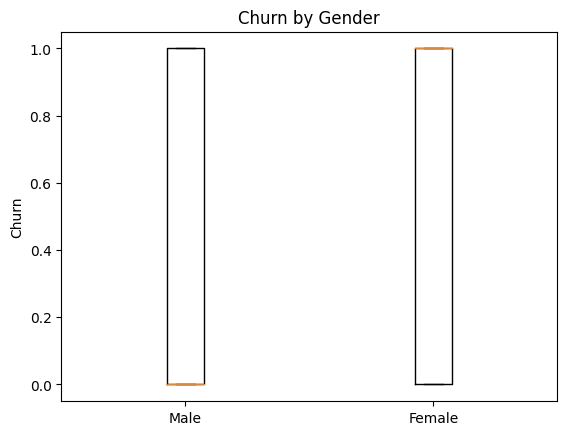

T-Statistic: -118.28703408904171
p-value: 0.0
Reject null hypothesis: The means are significantly different.


In [ ]:
# Create a box plot
plt.boxplot([monthly_data, annual_data], labels=["Monthly", "Annual"])
plt.title("Churn by period")
plt.ylabel("Churn")
plt.show()

print("T-Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject null hypothesis: The means are significantly different.")
else:
    print("Fail to reject null hypothesis: The means are not significantly different.")